In [27]:
import os,sys,re
import json
import pandas as pd
# import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import drain3
from tqdm import tqdm
import time
import numpy as np

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# import seaborn as sns
import matplotlib
from matplotlib.lines import Line2D
plt.style.use('seaborn-paper')
tex_fonts = {
    "font.family": "Times New Roman",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "font.weight":"bold"
}
plt.rcParams.update(tex_fonts)
width = 241.14749
def set_size(width, fraction=1):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float
            Document textwidth or columnwidth in pts
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure (in pts)
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

/var/folders/7c/yrh27ydd1y5dryl1wzwmwzzh0000gn/T/ipykernel_66202/1680768869.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


our: compared3 start:  2022/11/07 16:26:22


baseline: compared1 start: 2022/11/08 07:06:02

# our (compared3)

replace 3 with 1: **8**

no replace: **11**

In [29]:
# mainpath = ("/Users/nitrogenousfish/Desktop/ResearchArena/GraphDB/New Experiment/compared3")
# databases = os.path.join(mainpath,"databases")
# diff0 = os.path.join(mainpath,"diff")
# diff1 = os.path.join(mainpath,"diff-1")
# diff2 = os.path.join(mainpath,"diff-1")

# starttime = "2022/11/07 16:26:22"
# endtime = "2022/11/08 04:26:22"
# REPLACE = False

# baseline (compared1)

replace 3 with 1: **5**

no replace: **7**

In [30]:
# mainpath = ("/Users/nitrogenousfish/Desktop/ResearchArena/GraphDB/New Experiment/compared1")
# databases = os.path.join(mainpath,"databases")
# diffcompared = os.path.join(mainpath,"diff")
# starttime = "2022/11/08 07:06:02"
# endtime = "2022/11/08 19:06:02"
# REPLACE = False

# -something (compared2)

replace 3 with 1: **7**

no replace: **8**

In [31]:
# mainpath = ("/Users/nitrogenousfish/Desktop/ResearchArena/GraphDB/New Experiment/compared2")
# databases = os.path.join(mainpath,"databases")
# diffcompared = os.path.join(mainpath,"diff")
# starttime = "2022/11/09 03:28:50"
# endtime = "2022/11/09 15:28:50"
# REPLACE = True

In [32]:
ROOTPATH = "/Users/ddaa/Desktop/NewExperiment"
REPLACE = True

dataset = {
    "compared1":{
        "mainpath":os.path.join(ROOTPATH,'compared1'),
        "starttime":"2022/11/08 07:00:20",
        "endtime":"2022/11/08 19:30:20",
        "plotname":"compared1"
    },
    "compared2":{
        "mainpath":os.path.join(ROOTPATH,'compared2'),
        "starttime":"2022/11/09 03:20:50",
        "endtime":"2022/11/09 15:50:50",
        "plotname":"compared2"
    },
    "compared3":{
        "mainpath":os.path.join(ROOTPATH,'compared3'),
        "starttime":"2022/11/07 16:20:22",
        "endtime":"2022/11/08 04:50:22",
        "plotname":"compared3"
    },
}

In [33]:
def plotmain(mainpath,starttime,endtime):
    databases = os.path.join(mainpath,"databases")
    diffcompared = os.path.join(mainpath,"diff")
    def _align(i:str):
        timepath = os.path.join(os.path.join(databases,i),'time.txt')
        diff0num= os.path.join(os.path.join(mainpath,"diff"),i)
        diff1num= os.path.join(os.path.join(mainpath,"diff-1"),i)
        diff2num= os.path.join(os.path.join(mainpath,"diff-2"),i)

        timelist = []
        with open(timepath) as tp:
            timelist = tp.readlines()
        # time = pd.read_csv(timepath, sep=" ", header=None)
        diff000 = []
        diff001 = []
        diff002 = []
        with open(diff0num) as fp:
            diff000=fp.readlines()
        with open(diff1num) as fp:
            diff001=fp.readlines()
        with open(diff2num) as fp:
            diff002=fp.readlines()
        assert len(diff000) == len(diff001) and len(diff002) == len(diff001)
        diff_merge = []
        for i in range(len(diff000)):
            diff_merge.append(diff000[i]+diff001[i]+diff002[i])
        diff = [i.replace("]\n[",',') for i in diff_merge]


        if len(timelist) != len(diff):
            print (f"diff in {i}:  PASS")
            return "no","no"
        resdiff = []
        for d in diff:
            # resdiff.append(d.strip())
            if REPLACE:
                resdiff.append(d.strip().replace('3','1'))
            else:
                resdiff.append(d.strip())

        restimelist = []
        for t in timelist:
            logtime = time.strptime(t.strip(),r'%Y/%m/%d %H:%M:%S')
            restimelist.append(logtime)
        return restimelist,resdiff
    
    
    print(f"mainpath")
    len(os.listdir(diffcompared))
    glo_restime = []
    glo_resdiff = []
    for i in os.listdir(diffcompared): # 0-82
        restime,resdiff = _align(i)
        if restime!= 'no':
            glo_restime.extend(restime)
            glo_resdiff.extend(resdiff)
            # print(restime)
        # break
    redict = {}
    for i in range(len(glo_restime)):
        if glo_resdiff[i] not in redict.keys():
            redict[glo_resdiff[i]] = [glo_restime[i]]
        else:
            redict[glo_resdiff[i]].append(glo_restime[i])
    reverse_redict = {min(v):k for k,v in redict.items()}
    timekeys = [i for i in reverse_redict.keys()]
    timekeys.sort()
    print(f"keynum {len(timekeys)}")
    _cmppdtime = [pd.Timestamp(time.strftime(r'%Y/%m/%d %H:%M:%S',i)) for i in timekeys]
    alltime = pd.date_range(starttime,endtime,freq='S')
    reslist = [0 for _ in range(len(alltime)+1)]
    pos = 0
    for _idx,t in enumerate(alltime):
        idx = _idx+1
        if pos<len(_cmppdtime):
            if t == _cmppdtime[pos]:
                reslist[idx] = reslist[idx-1]+1
                pos += 1
            elif t<= _cmppdtime[pos]:
                reslist[idx] = reslist[idx-1]
            else:
                print("error1")
        else:
            if t> _cmppdtime[-1]:
                reslist[idx] = reslist[idx-1]
            else:
                print("error2")
    pdpd = pd.DataFrame(
        {
            'time': alltime,
            'num':reslist[1:]
        }
    )
    return pdpd



In [34]:
datalist = []
for k,v in dataset.items():
    print(v['mainpath'])
    ret_data = plotmain(v['mainpath'],v['starttime'],v['endtime'])
    datalist.append(ret_data)

/Users/ddaa/Desktop/NewExperiment/compared1
mainpath
keynum 17
/Users/ddaa/Desktop/NewExperiment/compared2
mainpath
keynum 24
/Users/ddaa/Desktop/NewExperiment/compared3
mainpath
keynum 49


In [35]:
totalhour = (len(datalist[0])-1)/3600
idx = np.linspace(0,totalhour,len(datalist[0])-1)

In [36]:
finaldata = pd.DataFrame({
    "compared1":list(datalist[0]['num'][1:]),
    "compared2":list(datalist[1]['num'][1:]),
    "compared3":list(datalist[2]['num'][1:])
},index = idx)

In [37]:
len(idx)

45000

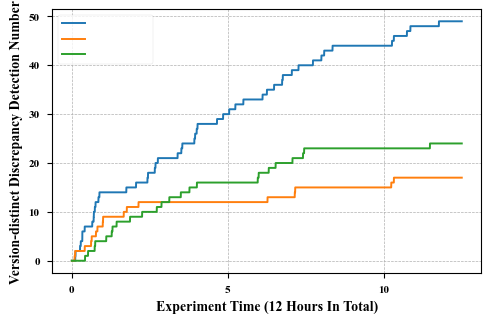

In [38]:
plt.figure(figsize=set_size(400))
plt.xlabel(r'Experiment Time (12 Hours In Total)',fontweight='bold')
plt.ylabel('Version-distinct Discrepancy Detection Number',fontweight='bold',fontsize=10)
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.plot(finaldata['compared3'],  label = 'compared3')
ax.plot(finaldata['compared1'],  label = 'compared1')
ax.plot(finaldata['compared2'],  label = 'compared2')
ax.legend([" "*20 for _ in range(3)])
plt.grid(linestyle = '--', linewidth = 0.5)
plt.savefig('compare123.svg', format='svg', bbox_inches='tight')

